# Stock Market Prediction using hybrid Numerical and Textual Analysis
## Task 7
## Author: Aayushma Pant

In [118]:
# For numerical data evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

In [119]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

## Importing the data

In [120]:
start = datetime.datetime(2019, 6, 30)
end = datetime.datetime(2020, 6, 30)

In [121]:

df = web.DataReader("TSLA",'yahoo', start, end)

In [122]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,46.619999,45.256001,46.042000,45.433998,41067000,45.433998
2019-07-02,45.830002,44.444000,45.778000,44.910000,46295000,44.910000
2019-07-03,48.313999,46.902000,47.877998,46.980000,71005500,46.980000
2019-07-05,47.090000,46.160000,46.914001,46.619999,35328500,46.619999
2019-07-08,46.450001,45.731998,46.248001,46.068001,29402500,46.068001


In [123]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,200.175995,190.628006,198.822006,192.169998,54798000,192.169998
2020-06-25,197.195999,187.429993,190.854004,197.195999,46272500,197.195999
2020-06-26,199.000000,190.973999,198.955994,191.947998,44274500,191.947998
2020-06-29,202.000000,189.703995,193.802002,201.869995,45132000,201.869995
2020-06-30,217.537994,200.746002,201.300003,215.962006,84592500,215.962006


## Analysing  Numerical Data and data cleaning

In [124]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

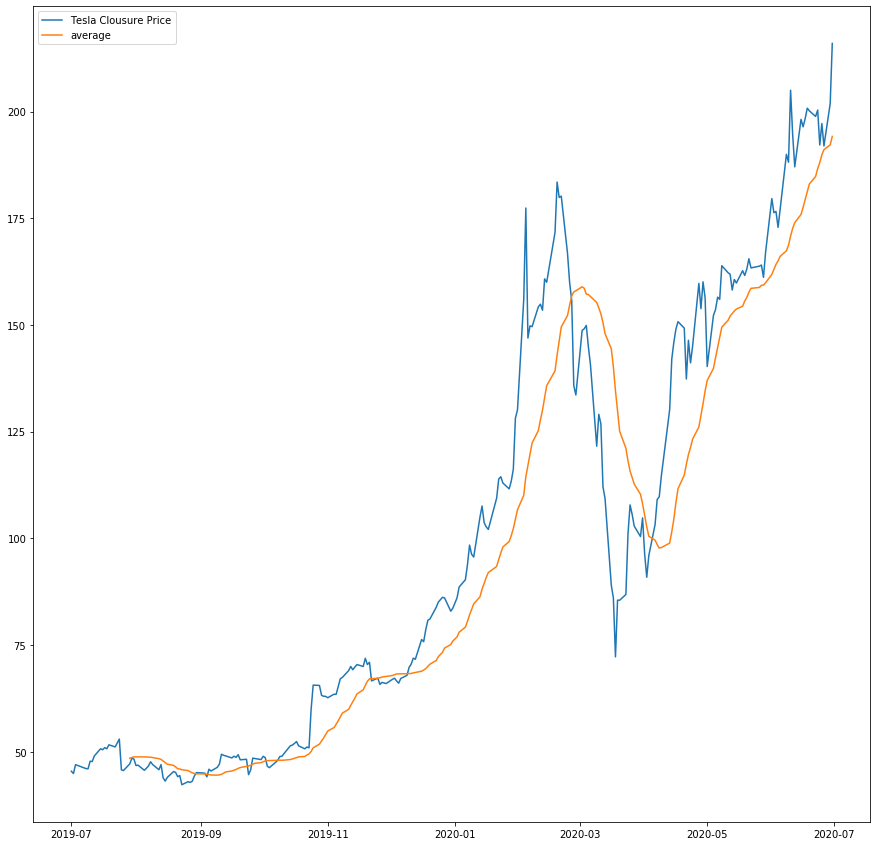

In [125]:

plt.figure(figsize=(15 , 15))
plt.plot(df['Adj Close'], label='Tesla Clousure Price')
plt.plot(df["Adj Close"].rolling(window = 20).mean(), label='average')
plt.legend()


## Daily return of the stock on average
## To analyse the risk of the stock daily changes of the stock must be calculated.

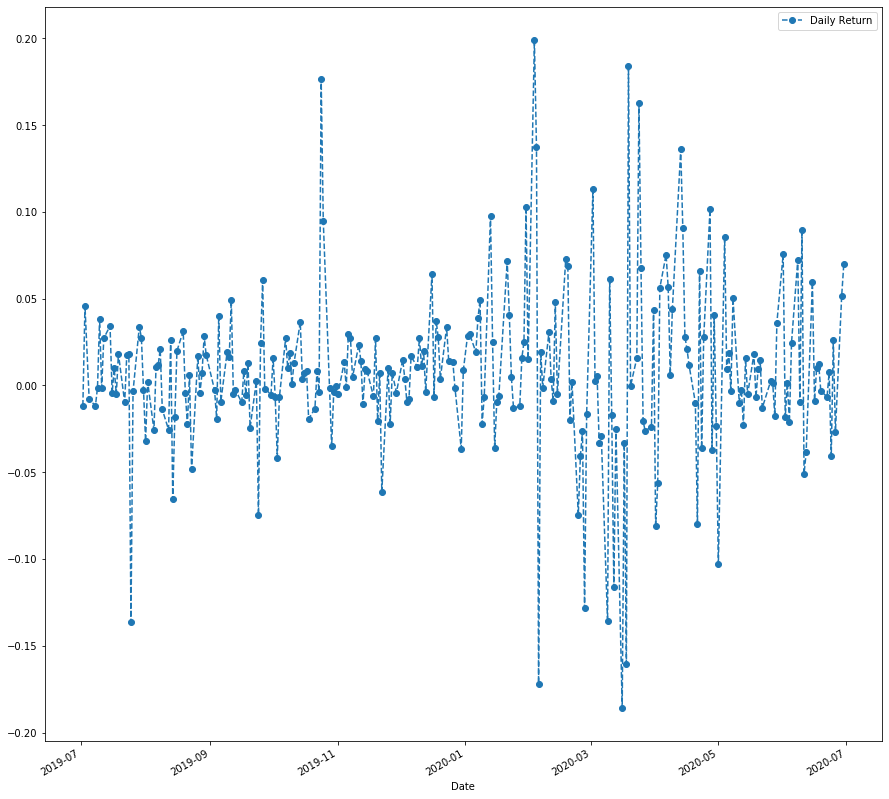

In [126]:
df['Daily Return'] = df['Adj Close'].pct_change()

df['Daily Return'].plot(figsize = (15 , 15),legend=True, linestyle='--', marker='o')

## Here during 2020-4 the point fall below -15% so it is the risky stock and at such time buying of stock can cause loss

Text(0.5, 1.0, 'Tesla Risk Analysis')

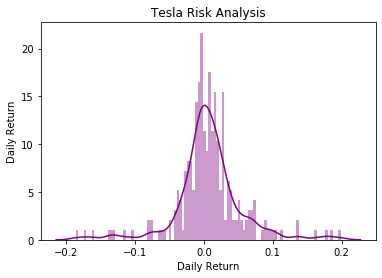

In [151]:
sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title("Tesla Risk Analysis")

In [131]:
data = df.filter(['Close']).values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(data))*0.85)

training_data_len

215

In [132]:
# total data in training will be 215 datas and remaining will be our test data

## Model Training using ARIMA (Auto Regressive Integrated Moving Average)

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

mn = MinMaxScaler(feature_range=(0,1))
scaled_data = mn.fit_transform(data)

In [134]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
test_data=scaled_data[int(training_data_len):, :]


In [143]:
history = [i for i in train_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,2,0)) #p,q,moving average
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_observed = test_data[time_point]
    print('predicted=%f, expected=%f' % (yhat, true_observed))
    history.append(true_observed)
print(model_fit.summary())    
error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(error))
    

predicted=0.692257, expected=0.654806
predicted=0.661667, expected=0.700153
predicted=0.720886, expected=0.690791
predicted=0.699869, expected=0.688626
predicted=0.702458, expected=0.667381
predicted=0.656034, expected=0.681625
predicted=0.679274, expected=0.676835
predicted=0.671423, expected=0.693486
predicted=0.702972, expected=0.687014
predicted=0.688014, expected=0.695708
predicted=0.702901, expected=0.709573
predicted=0.714368, expected=0.697228
predicted=0.700502, expected=0.699520
predicted=0.701788, expected=0.701086
predicted=0.697635, expected=0.684481
predicted=0.680250, expected=0.718094
predicted=0.724845, expected=0.790755
predicted=0.819003, expected=0.771709
predicted=0.799590, expected=0.773321
predicted=0.796312, expected=0.751926
predicted=0.737986, expected=0.776430
predicted=0.778938, expected=0.850428
predicted=0.874996, expected=0.839776
predicted=0.866977, expected=0.936942
predicted=0.993487, expected=0.876821
predicted=0.886699, expected=0.833569
predicted=0.

## predicted Results

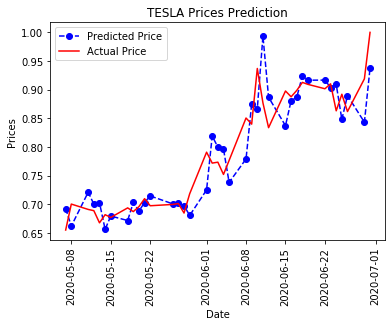

In [144]:
test_set_range = df[int(training_data_len):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.legend()
plt.show()

## Now reading the textual datasets for creating hybrid model in Stock prediction

In [3]:
df1=pd.read_csv("india-news-headlines.csv")

In [4]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


## Cleaning the  textual data

In [5]:
df1['Date'] = pd.to_datetime(df1['publish_date'],format= '%Y%m%d')
df1=df1.drop(["headline_category",'publish_date'],axis=1)
df1.head()

,headline_text,Date
0,win over cena satisfying but defeating underta...,2001-01-01
1,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
2,Fissures in Hurriyat over Pak visit,2001-01-02
3,America's unwanted heading for India?,2001-01-02
4,For bigwigs; it is destination Goa,2001-01-02


In [6]:
df1['news'] = df1.groupby(['Date']).transform(lambda x : ' '.join(x))
df1=df1.drop("headline_text",axis=1)
news=df1.drop_duplicates()

In [9]:

news.reset_index(inplace = True, drop = True)
news.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7080 non-null   datetime64[ns]
 1   news    7080 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 110.8+ KB


In [ ]:
## Importing necessary files

In [146]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob  
lemmatizer = WordNetLemmatizer() 
ps = PorterStemmer()  


In [11]:
start = datetime.date(2019, 6, 30)
end = datetime.date(2020, 6, 30)
start_date = pd.to_datetime('2019-06-30')
end_date = pd.to_datetime('2020-06-30')
news=news.loc[(news['Date'] > start_date) & (news['Date'] < end_date)]

In [25]:
news=news.reset_index()

In [26]:
news=news.drop("index",axis=1)

In [27]:
news

,Date,news
0,2019-07-01,Micro review: 'Tom Clancy: Enemy Contact' by M...
1,2019-07-02,Invest in a secure future for your parents Ban...
2,2019-07-03,One actor; six characters: A solo theatre act ...
3,2019-07-04,Party night in Candolim Party night in Candoli...
4,2019-07-05,Telangana CM's school gets swanky building; mo...
...,...,...
360,2020-06-25,Truck firms look for new export markets to sel...
361,2020-06-26,Containment zone residents slam high prices ch...
362,2020-06-27,like me i wont let you have a toxic relationsh...
363,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...


## Cleaning the data 

In [28]:
sent = []
for i in range(0,len(news['news'])):
    new = re.sub('[^a-zA-Z]',' ',news['news'][i])
    new = new.lower()
    new = new.split()
    new = [lemmatizer.lemmatize(word) for word in new if not word in set(stopwords.words('english'))]
    new=' '.join(new)
    sent.append(new)

In [33]:
news["news"]=pd.Series(sent)
news["news"]

0      micro review tom clancy enemy contact mike mad...
1      invest secure future parent bank fraud ed sear...
2      one actor six character solo theatre act set s...
3      party night candolim party night candolim raja...
4      telangana cm school get swanky building modern...
                             ...                        
360    truck firm look new export market sell b range...
361    containment zone resident slam high price char...
362    like wont let toxic relationship food major ra...
363    atanu ghosh plan rewrite old script make relev...
364    hot stylish bikini look katrina kaif anna eden...
Name: news, Length: 365, dtype: object

In [39]:
def getSubjectivity(text):
     return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
     return  TextBlob(text).sentiment.polarity

#Adding subjectivity and polarity columns
news['Subjectivity'] = news['news'].apply(getSubjectivity)
news['Polarity'] =news['news'].apply(getPolarity)
news

,Date,news,Subjectivity,Polarity
0,2019-07-01,micro review tom clancy enemy contact mike mad...,0.393000,0.022048
1,2019-07-02,invest secure future parent bank fraud ed sear...,0.380064,0.022599
2,2019-07-03,one actor six character solo theatre act set s...,0.359821,0.012605
3,2019-07-04,party night candolim party night candolim raja...,0.439894,0.067461
4,2019-07-05,telangana cm school get swanky building modern...,0.388086,0.020945
...,...,...,...,...
360,2020-06-25,truck firm look new export market sell b range...,0.377764,0.000578
361,2020-06-26,containment zone resident slam high price char...,0.365790,0.041056
362,2020-06-27,like wont let toxic relationship food major ra...,0.371535,0.061702
363,2020-06-28,atanu ghosh plan rewrite old script make relev...,0.392516,0.045515


In [41]:
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['news']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['news']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['news']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['news']]
news

,Date,news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,micro review tom clancy enemy contact mike mad...,0.393000,0.022048,-0.9999,0.169,0.739,0.092
1,2019-07-02,invest secure future parent bank fraud ed sear...,0.380064,0.022599,-0.9998,0.162,0.736,0.102
2,2019-07-03,one actor six character solo theatre act set s...,0.359821,0.012605,-0.9999,0.189,0.706,0.106
3,2019-07-04,party night candolim party night candolim raja...,0.439894,0.067461,-0.9998,0.167,0.727,0.107
4,2019-07-05,telangana cm school get swanky building modern...,0.388086,0.020945,-0.9998,0.179,0.712,0.110
...,...,...,...,...,...,...,...,...
360,2020-06-25,truck firm look new export market sell b range...,0.377764,0.000578,-0.9999,0.184,0.740,0.076
361,2020-06-26,containment zone resident slam high price char...,0.365790,0.041056,-0.9998,0.172,0.726,0.103
362,2020-06-27,like wont let toxic relationship food major ra...,0.371535,0.061702,-0.9998,0.165,0.736,0.099
363,2020-06-28,atanu ghosh plan rewrite old script make relev...,0.392516,0.045515,-0.9999,0.179,0.730,0.091


## Merging two dataframes: text ual and numerical

In [50]:
df_merge = pd.merge(df, news, how='inner', on='Date')
df_merge

,Date,High,Low,Open,Close,Volume,Adj Close,news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,46.619999,45.256001,46.042000,45.433998,41067000,45.433998,micro review tom clancy enemy contact mike mad...,0.393000,0.022048,-0.9999,0.169,0.739,0.092
1,2019-07-02,45.830002,44.444000,45.778000,44.910000,46295000,44.910000,invest secure future parent bank fraud ed sear...,0.380064,0.022599,-0.9998,0.162,0.736,0.102
2,2019-07-03,48.313999,46.902000,47.877998,46.980000,71005500,46.980000,one actor six character solo theatre act set s...,0.359821,0.012605,-0.9999,0.189,0.706,0.106
3,2019-07-05,47.090000,46.160000,46.914001,46.619999,35328500,46.619999,telangana cm school get swanky building modern...,0.388086,0.020945,-0.9998,0.179,0.712,0.110
4,2019-07-08,46.450001,45.731998,46.248001,46.068001,29402500,46.068001,thailand meet eye guide exploring micro review...,0.371236,0.054418,-0.9997,0.165,0.726,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-06-23,202.399994,198.802002,199.776001,200.356003,31826500,200.356003,delayed period time accept household chore equ...,0.339187,0.056391,-0.9999,0.169,0.740,0.091
248,2020-06-24,200.175995,190.628006,198.822006,192.169998,54798000,192.169998,never thought voice today vidya rajput never t...,0.373125,0.064799,-0.9998,0.156,0.751,0.093
249,2020-06-25,197.195999,187.429993,190.854004,197.195999,46272500,197.195999,truck firm look new export market sell b range...,0.377764,0.000578,-0.9999,0.184,0.740,0.076
250,2020-06-26,199.000000,190.973999,198.955994,191.947998,44274500,191.947998,containment zone resident slam high price char...,0.365790,0.041056,-0.9998,0.172,0.726,0.103


In [51]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,45.433998,0.393000,0.022048,-0.9999,0.169,0.739,0.092
1,44.910000,0.380064,0.022599,-0.9998,0.162,0.736,0.102
2,46.980000,0.359821,0.012605,-0.9999,0.189,0.706,0.106
3,46.619999,0.388086,0.020945,-0.9998,0.179,0.712,0.110
4,46.068001,0.371236,0.054418,-0.9997,0.165,0.726,0.109
...,...,...,...,...,...,...,...
247,200.356003,0.339187,0.056391,-0.9999,0.169,0.740,0.091
248,192.169998,0.373125,0.064799,-0.9998,0.156,0.751,0.093
249,197.195999,0.377764,0.000578,-0.9999,0.184,0.740,0.076
250,191.947998,0.365790,0.041056,-0.9998,0.172,0.726,0.103


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = pd.DataFrame(sc.fit_transform(df_final))
df.columns = df_final.columns
df.index = df_final.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.019382,0.528294,0.244262,0.00005,0.494949,0.616279,0.255814
1,0.016162,0.423610,0.248595,0.00010,0.424242,0.581395,0.372093
2,0.028882,0.259796,0.169883,0.00005,0.696970,0.232558,0.418605
3,0.026670,0.488533,0.235570,0.00010,0.595960,0.302326,0.465116
4,0.023278,0.352173,0.499212,0.00015,0.454545,0.465116,0.453488


# Traing of hybrid model

In [56]:
X=df.drop("Close",axis=1)
y=df["Close"]

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=141)
X_train=np.array(X_train)
y_train=np.array(y_train)

In [104]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics  


In [148]:
## Using Random Forest Regression

In [106]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(metrics.mean_squared_error(y_pred,y_test))


0.06501362919492334


In [149]:
## Using AdaBoostRegressor

In [117]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print(metrics.mean_squared_error(y_pred, y_test))

0.06880121684836292


In [150]:
## Hence, the model fits best for random forest regressor